A partir del archivo Euro_2012_stats_TEAM, se pide:

1. Obtener la matriz de correlación. ¿Qué columnas están mejor correlacionadas?

2. ¿Existe algún tipo de relación entre la precisión de disparo a puerta (Shooting Accuracy) con respecto a los goles? Muestra en una gráfica (pintando la línea en la distribución de ambas variables) y usando Regresión Lineal, Regresión no Lineal con polinomio y SVR la relación entre ambos. Por cada porcentaje de acierto de cara a puerta, ¿cuánto aumenta o disminuye el número de goles? 

3. Si tratamos la columna Goals como una columna categórica y usando logistic regression, SVM y Random forest, ¿cuántos goles marcaría un equipo que tiene...? (por cada algoritmo):

    - % de goles por disparo: 40%
    - Total shots (inc. Blocked): 102
    - Corners Taken: 5
    - Passes: 82
    - Dribbles: 23

### 1. Las 10 columnas mejor correlacionadas son:

Subs on,                     Subs off            1.000000

Passes,                      Passes completed    0.997697
                            Touches             0.993044

Passes completed,            Touches             0.984324

Shots on target,             Touches             0.934623
                            Passes              0.930337
                            Passes completed    0.923242

Fouls Won,                   Subs on             0.907719
                            Subs off            0.907719

Total shots (inc. Blocked),  Touches             0.894708







### 2. la correlación entre Shooting Accuracy y Goals es: 0.521210

In [1]:
import pandas as pd
df = pd.read_csv("../data/Euro_2012_stats_TEAM.csv")

df

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,6,66.7%,48,56,3,7,1,7,7,17


In [2]:
df.columns

Index(['Team', 'Goals', 'Shots on target', 'Shots off target',
       'Shooting Accuracy', '% Goals-to-shots', 'Total shots (inc. Blocked)',
       'Hit Woodwork', 'Penalty goals', 'Penalties not scored', 'Headed goals',
       'Passes', 'Passes completed', 'Passing Accuracy', 'Touches', 'Crosses',
       'Dribbles', 'Corners Taken', 'Tackles', 'Clearances', 'Interceptions',
       'Clearances off line', 'Clean Sheets', 'Blocks', 'Goals conceded',
       'Saves made', 'Saves-to-shots ratio', 'Fouls Won', 'Fouls Conceded',
       'Offsides', 'Yellow Cards', 'Red Cards', 'Subs on', 'Subs off',
       'Players Used'],
      dtype='object')

# 1

### Miramos el tipo de variable de cada columna

In [3]:
df.dtypes

Team                           object
Goals                           int64
Shots on target                 int64
Shots off target                int64
Shooting Accuracy              object
% Goals-to-shots               object
Total shots (inc. Blocked)      int64
Hit Woodwork                    int64
Penalty goals                   int64
Penalties not scored            int64
Headed goals                    int64
Passes                          int64
Passes completed                int64
Passing Accuracy               object
Touches                         int64
Crosses                         int64
Dribbles                        int64
Corners Taken                   int64
Tackles                         int64
Clearances                      int64
Interceptions                   int64
Clearances off line           float64
Clean Sheets                    int64
Blocks                          int64
Goals conceded                  int64
Saves made                      int64
Saves-to-sho

### Pasamos las variables tipo object (son las que tienen el símbolo de %) a float. Excepto la de Team que es realmente string

In [4]:
df["Shooting Accuracy"] = df["Shooting Accuracy"].str.rstrip('%').astype('float')

In [5]:
df["% Goals-to-shots"] = df["% Goals-to-shots"].str.rstrip('%').astype('float')

In [6]:
df["Passing Accuracy"] = df["Passing Accuracy"].str.rstrip('%').astype('float')

In [7]:
df["Saves-to-shots ratio"] = df["Saves-to-shots ratio"].str.rstrip('%').astype('float')

In [8]:
df.dtypes

Team                           object
Goals                           int64
Shots on target                 int64
Shots off target                int64
Shooting Accuracy             float64
% Goals-to-shots              float64
Total shots (inc. Blocked)      int64
Hit Woodwork                    int64
Penalty goals                   int64
Penalties not scored            int64
Headed goals                    int64
Passes                          int64
Passes completed                int64
Passing Accuracy              float64
Touches                         int64
Crosses                         int64
Dribbles                        int64
Corners Taken                   int64
Tackles                         int64
Clearances                      int64
Interceptions                   int64
Clearances off line           float64
Clean Sheets                    int64
Blocks                          int64
Goals conceded                  int64
Saves made                      int64
Saves-to-sho

### Matriz de correlación

In [9]:
df.corr()

,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,Headed goals,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
Goals,1.000000,0.804193,0.403821,0.521210,0.533239,0.650109,0.200512,0.730437,0.023094,0.349330,...,0.143912,0.394424,0.663876,0.483833,0.703043,0.337709,-3.580574e-01,0.727830,0.727830,0.136067
Shots on target,0.804193,1.000000,0.611185,0.504487,0.049623,0.886090,0.212932,0.478610,-0.229945,0.210571,...,0.085059,0.218915,0.765949,0.658353,0.696263,0.544307,-3.340500e-01,0.821342,0.821342,0.249516
Shots off target,0.403821,0.611185,1.000000,-0.269946,-0.389095,0.887032,0.581655,0.126783,-0.173221,0.002284,...,0.086157,0.187128,0.615058,0.434815,0.344626,0.534186,-3.377661e-01,0.544974,0.544974,0.045973
Shooting Accuracy,0.521210,0.504487,-0.269946,1.000000,0.548827,0.125994,-0.198917,0.234263,-0.223483,0.485392,...,0.179562,0.220664,0.235577,0.406282,0.382686,0.163668,-1.883518e-01,0.377589,0.377589,-0.022610
% Goals-to-shots,0.533239,0.049623,-0.389095,0.548827,1.000000,-0.195113,-0.087481,0.480954,0.370202,0.384424,...,0.121014,0.238564,0.034561,0.014626,0.255441,-0.071731,-1.669397e-01,0.130146,0.130146,-0.022179
Total shots (inc. Blocked),0.650109,0.886090,0.887032,0.125994,-0.195113,1.000000,0.400121,0.299397,-0.234668,0.125738,...,0.148269,0.252407,0.766215,0.623288,0.589635,0.622268,-3.604662e-01,0.763336,0.763336,0.157812
Hit Woodwork,0.200512,0.212932,0.581655,-0.198917,-0.087481,0.400121,1.000000,-0.076923,-0.041345,0.020174,...,-0.230524,-0.200695,0.141180,0.303987,0.113657,0.319708,-2.820513e-01,0.204511,0.204511,-0.189466
Penalty goals,0.730437,0.478610,0.126783,0.234263,0.480954,0.299397,-0.076923,1.000000,0.537484,-0.020174,...,0.058761,0.135145,0.528185,0.114404,0.627220,0.085467,1.794872e-01,0.531727,0.531727,0.351866
Penalties not scored,0.023094,-0.229945,-0.173221,-0.223483,0.370202,-0.234668,-0.041345,0.537484,1.000000,-0.357830,...,0.051019,-0.149787,0.163643,-0.107169,0.210417,0.127603,5.374838e-01,0.084796,0.084796,0.480079
Headed goals,0.349330,0.210571,0.002284,0.485392,0.384424,0.125738,0.020174,-0.020174,-0.357830,1.000000,...,0.458773,0.578573,0.157215,0.117445,0.188786,0.067245,-3.429623e-01,0.216077,0.216077,-0.447214


### Obtener las 10 correlaciones más altas

In [10]:
# Para poder aplicar las funciones que me permiten obtener las correlaciones más altas. Elimino previamente las variables string

df_Team = ['Team']
df.drop(df_Team, inplace = True, axis=1)


# Función para eliminar las correlaciones de la diagonal y las repetidas

def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

# Función para obtener el Top x de correlaciones más altas que queramos

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(df, 10))



Top Absolute Correlations
Subs on                     Subs off            1.000000
Passes                      Passes completed    0.997697
                            Touches             0.993044
Passes completed            Touches             0.984324
Shots on target             Touches             0.934623
                            Passes              0.930337
                            Passes completed    0.923242
Fouls Won                   Subs on             0.907719
                            Subs off            0.907719
Total shots (inc. Blocked)  Touches             0.894708
dtype: float64


# 2

### ¿Existe algún tipo de relación entre la precisión de disparo a puerta (Shooting Accuracy) con respecto a los goles? Muestra en una gráfica (pintando la línea en la distribución de ambas variables) y usando Regresión Lineal, Regresión no Lineal con polinomio y SVR la relación entre ambos. Por cada porcentaje de acierto de cara a puerta, ¿cuánto aumenta o disminuye el número de goles?

In [11]:
Shooting_Accuracy_Goals = df[['Shooting Accuracy','Goals']]
correlation = Shooting_Accuracy_Goals.corr(method='pearson')
correlation

,Shooting Accuracy,Goals
Shooting Accuracy,1.00000,0.52121
Goals,0.52121,1.00000


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures # Regresión polinómica
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVR
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import linear_model  # Regresión logística
from sklearn import svm
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold, RepeatedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

### Regresión lineal

In [13]:
# especificamos qué variables es independiente y cuál es dependiente

X = Shooting_Accuracy_Goals['Shooting Accuracy'].values.reshape(-1, 1)  # values converts it into a numpy array
y = Shooting_Accuracy_Goals['Goals'].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column

In [14]:
# Test/train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

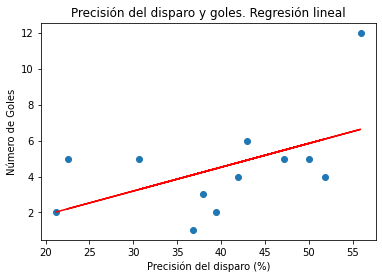

In [15]:
linear_regressor = LinearRegression(n_jobs = -1)  # create object for the class
linear_regressor.fit(X_train, y_train)  # perform linear regression
y_pred = linear_regressor.predict(X_train)  # make predictions
plt.scatter(X_train, y_train)
plt.title('Precisión del disparo y goles. Regresión lineal')
plt.xlabel('Precisión del disparo (%)')
plt.ylabel('Número de Goles')

plt.plot(X_train, y_pred, color='red')

plt.show()

In [16]:
linear_regressor.score(X_train, y_train) * 100

26.640163529967676

In [17]:
linear_regressor.intercept_

array([-0.78294701])

In [18]:
linear_regressor.coef_

array([[0.13251539]])

### El porcentaje de aciertos con este modelo es bajo. Únicamente del 26,64%
#### Por cada porcentaje de disparo preciso a puerta el número de goles aumenta un 0.1398144

### Regresión no lineal con polinomio

In [24]:
degree=5

# Paso nº 1 - Llamamos a fit_transform 
# Calculamos las pendientes de nuestras Xn
polinominal_model = PolynomialFeatures(degree) 
X_poly = polinominal_model.fit_transform(X_train.reshape(-1, 1), y_train)

#######
print(X_poly)
print(X_poly.shape)

# Paso nº2
# Llamar a la regresión lineal entrenándola con la salida del fit_transform
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_poly, y_train)
y_pred = lin_reg_model.predict(X_poly)

print("y_pred", y_pred.shape)
print("Score:", r2_score(y_train, y_pred))



[[1.00000000e+00 2.25000000e+01 5.06250000e+02 1.13906250e+04
  2.56289062e+05 5.76650391e+06]
 [1.00000000e+00 5.19000000e+01 2.69361000e+03 1.39798359e+05
  7.25553483e+06 3.76562258e+08]
 [1.00000000e+00 4.19000000e+01 1.75561000e+03 7.35600590e+04
  3.08216647e+06 1.29142775e+08]
 [1.00000000e+00 4.72000000e+01 2.22784000e+03 1.05154048e+05
  4.96327107e+06 2.34266394e+08]
 [1.00000000e+00 5.59000000e+01 3.12481000e+03 1.74676879e+05
  9.76443754e+06 5.45832058e+08]
 [1.00000000e+00 4.30000000e+01 1.84900000e+03 7.95070000e+04
  3.41880100e+06 1.47008443e+08]
 [1.00000000e+00 3.68000000e+01 1.35424000e+03 4.98360320e+04
  1.83396598e+06 6.74899480e+07]
 [1.00000000e+00 5.00000000e+01 2.50000000e+03 1.25000000e+05
  6.25000000e+06 3.12500000e+08]
 [1.00000000e+00 3.07000000e+01 9.42490000e+02 2.89344430e+04
  8.88287400e+05 2.72704232e+07]
 [1.00000000e+00 3.94000000e+01 1.55236000e+03 6.11629840e+04
  2.40982157e+06 9.49469698e+07]
 [1.00000000e+00 3.79000000e+01 1.43641000e+03 5.4

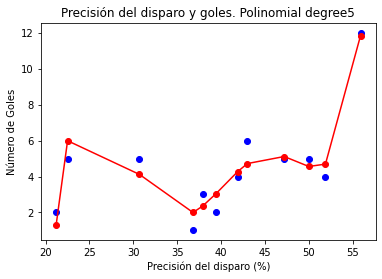

In [25]:
degree = 5

X_train_to_show, y_train_to_show = zip(*sorted(zip(X_train, y_train)))
plt.scatter(X_train_to_show, y_train_to_show, color='b')
X_train_to_show, y_pred = zip(*sorted(zip(X_train, y_pred)))
plt.plot(X_train_to_show, y_pred, color='red')
plt.scatter(X_train_to_show, y_pred, color='red')
plt.title('Precisión del disparo y goles. Polinomial degree' + str(degree))
plt.xlabel('Precisión del disparo (%)')
plt.ylabel('Número de Goles')
plt.show()

In [26]:
lin_reg_model.intercept_

array([-1725.11652544])

In [27]:
lin_reg_model.coef_

array([[ 0.00000000e+00,  2.44631609e+02, -1.34188167e+01,
         3.57948725e-01, -4.65873515e-03,  2.37396483e-05]])

### Con la regresión polinomial el porcentaje de aciertos sube a 91,7%
### El número de goles aumenta o disminuye en función del porcentaje de disparos precisos a puerta:
    - De aproximadamente un 21% a 23% de disparos precisos a puerta el número de goles aumenta 2.44
    - De aprox 23% a 37% el número de goles disminuye -1.34
    - De aprox 37% a 47% el número de goles aumenta 3.57
    - De aprox 47% a 50% el número de goles disminuye -4.65
    - De aprox 50% a 55% el número de goles aumenta 2.37

### No me encajan mucho con la gráfica algunos de los coeficientes. La bajada de -4.65 en el intervalo de 47% a 50% no parece que sea tan pronunciada
### Se podrían obtener estos intervalos de forma más precisa. Qué con algún código se puedan obtener los intervalos en los que varía la pendiente???


### SVR

model.score: 0.9986811523545757
C:\Users\ggarr\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


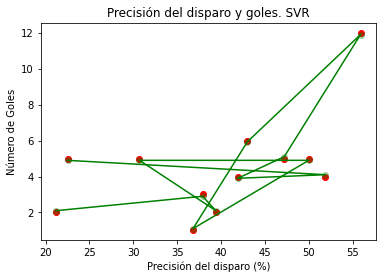

In [34]:
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
model = svr_rbf.fit(X_train, y_train)
print("model.score:", model.score(X_train, y_train))
y_prediction = model.predict(X_train)
plt.scatter(X_train, y_train, color='red')
plt.scatter(X_train, y_prediction, color='green', alpha=0.3)
plt.title('Precisión del disparo y goles. SVR')
plt.xlabel('Precisión del disparo (%)')
plt.ylabel('Número de Goles')
plt.plot(X_train, y_prediction, color='green')

In [35]:
model.intercept_

array([4.68139784])

In [36]:
model.coef_

AttributeError: coef_ is only available when using a linear kernel

### Es el modelo con mayor porcentaje de aciertos: 99,86% pero el que menos información nos aporta. No podemos calcular los coeficientes con lo que no sabemos como aumentan o disminuyen los goles en función del número de disparos precisos a puerta 

### Si se utiliza el kernel = linear el porcentaje de acierto es muy bajo y devuelve una regresión lineal

# 3


In [ ]:
Si tratamos la columna Goals como una columna categórica y usando logistic regression, SVM y Random forest, ¿cuántos goles marcaría un equipo que tiene...? (por cada algoritmo):

% de goles por disparo: 40%
Total shots (inc. Blocked): 102
Corners Taken: 5
Passes: 82
Dribbles: 23

### Con los distintos algoritmos me hace la misma predicción. Que se marcarían 5 goles. No sé me resulta extraño. Seguramente algo está mal

In [63]:
X = np.array(df.drop(['Goals', 'Shots on target', 'Shots off target',
       'Shooting Accuracy', 'Hit Woodwork', 'Penalty goals', 'Penalties not scored', 'Headed goals',
       'Passes completed', 'Passing Accuracy', 'Touches', 'Crosses', 'Tackles', 'Clearances', 'Interceptions',
       'Clearances off line', 'Clean Sheets', 'Blocks', 'Goals conceded', 'Saves made', 'Saves-to-shots ratio', 'Fouls Won', 'Fouls Conceded', 'Offsides', 'Yellow Cards', 'Red Cards', 'Subs on', 'Subs off', 'Players Used'], axis=1))
y = np.array(df['Goals'])
print(y.shape)
X.shape

(16,)


(16, 5)

### Regresión logística

In [52]:
model = linear_model.LogisticRegression(max_iter=100,random_state=7)
# No se está entrenado con el conjunto de entrenamiento
model.fit(X,y)
model.score(X, y)

C:\Users\ggarr\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.75

In [53]:
y_predict = model.predict(X)
print(y_predict)

[ 5  4  4  4  3 10  5  6  2  2  6  5  5 12  5 10]


In [54]:
X_new = pd.DataFrame({'% Goals-to-shots': [40.0], 'Total shots (inc. Blocked)': [102], 'Corners Taken': [5], 'Passes': [82], 'Dribbles': [23]})
X_new

,% Goals-to-shots,Total shots (inc. Blocked),Corners Taken,Passes,Dribbles
0,40.0,102,5,82,23


In [55]:
model.predict(X_new)

array([5], dtype=int64)

In [49]:
# Test/train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [50]:
model = linear_model.LogisticRegression(max_iter=100,random_state=7)
# No se está entrenado con el conjunto de entrenamiento
model.fit(X_train,y_train)
model.score(X_train, y_train)

C:\Users\ggarr\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


1.0

In [51]:
y_predict = model.predict(X)
print(y_predict)

[ 4  4  5  5  3  1  5  6  2  2  2  1  5 12  5  2]


In [56]:
X_new_1 = pd.DataFrame({'% Goals-to-shots': [40.0], 'Total shots (inc. Blocked)': [102], 'Corners Taken': [5], 'Passes': [82], 'Dribbles': [23]})
X_new_1

,% Goals-to-shots,Total shots (inc. Blocked),Corners Taken,Passes,Dribbles
0,40.0,102,5,82,23


In [57]:
model.predict(X_new_1)

array([5], dtype=int64)

### SVM

In [82]:
# X e y tienen que ser un array

C = 1000
gamma = 10

# rbf -- Radial basis function
clf = svm.SVC(C=C, kernel='rbf', gamma=gamma, random_state=7)
clf.fit(X_train, y_train)
print ('score:', clf.score(X_train, y_train))

score: 1.0


In [83]:
X_svm = pd.DataFrame({'% Goals-to-shots': [40.0], 'Total shots (inc. Blocked)': [102], 'Corners Taken': [5], 'Passes': [82], 'Dribbles': [23]})
X_svm

,% Goals-to-shots,Total shots (inc. Blocked),Corners Taken,Passes,Dribbles
0,40.0,102,5,82,23


In [84]:
clf.predict(X_svm)

array([5], dtype=int64)

### Random Forest

In [85]:
model = RandomForestClassifier()
# evaluate the model 
# THIS DOESN'T TRAIN THE MODEL
k_fold = RepeatedStratifiedKFold(n_splits=3, n_repeats=2, random_state=7)
n_scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=k_fold, n_jobs=-1, error_score='raise')
# report performance
print(n_scores)
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

C:\Users\ggarr\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\ggarr\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"
[0.5  0.25 0.25 0.25 0.25 0.25]


NameError: name 'mean' is not defined

### No sé por qué no lee bien el mean????

In [86]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [87]:
model.score(X_train, y_train)

1.0

In [88]:
X_RF = pd.DataFrame({'% Goals-to-shots': [40.0], 'Total shots (inc. Blocked)': [102], 'Corners Taken': [5], 'Passes': [82], 'Dribbles': [23]})
X_RF

,% Goals-to-shots,Total shots (inc. Blocked),Corners Taken,Passes,Dribbles
0,40.0,102,5,82,23


In [89]:
model.predict(X_RF)

array([5], dtype=int64)